In [51]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import calplot
import matplotlib.colors as mcolors
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression

In [42]:
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv("listings.csv")

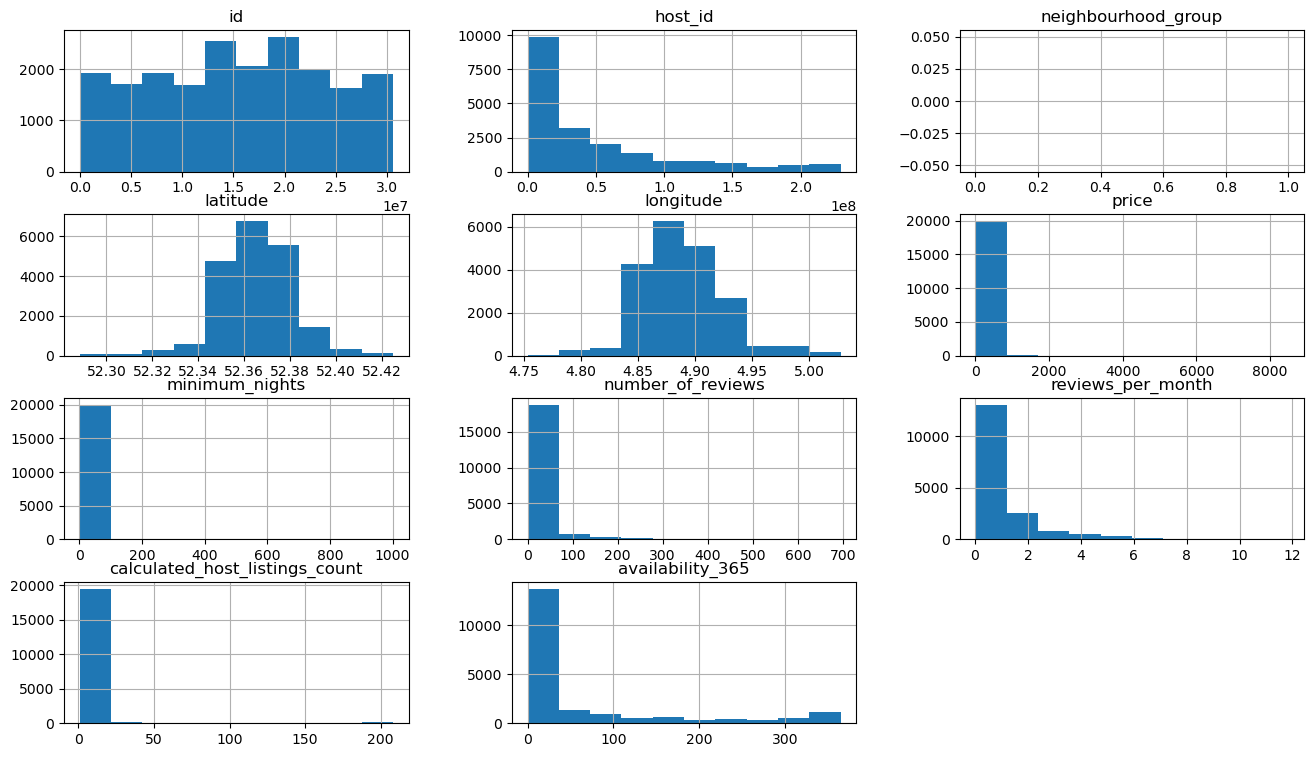

In [43]:
listing.hist(figsize= (16,9))
plt.show()

In [45]:
listing.isnull()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
20026,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
20027,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
20028,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False


In [37]:
df['neighbourhood'].value_counts()

neighbourhood
De Baarsjes - Oud-West                    3515
De Pijp - Rivierenbuurt                   2493
Centrum-West                              2326
Centrum-Oost                              1730
Westerpark                                1490
Zuid                                      1441
Oud-Oost                                  1282
Bos en Lommer                             1145
Oostelijk Havengebied - Indische Buurt     959
Oud-Noord                                  571
Watergraafsmeer                            552
IJburg - Zeeburgereiland                   452
Slotervaart                                393
Noord-West                                 320
Buitenveldert - Zuidas                     262
Noord-Oost                                 257
Geuzenveld - Slotermeer                    212
Osdorp                                     159
De Aker - Nieuw Sloten                     142
Gaasperdam - Driemond                      122
Bijlmer-Centrum                            111

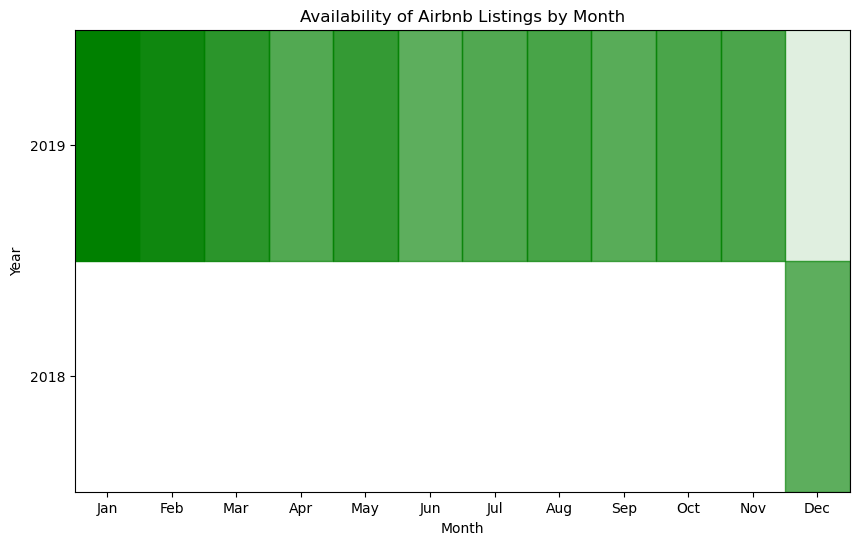

In [38]:
calendar = pd.read_csv('calendar.csv')

# Convert the date column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the month and year from the date
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year

# Group the data by month and count the number of available listings
availability_counts = calendar[calendar['available'] == 't'].groupby(['year', 'month']).size().reset_index(name='count')

# Normalize the count values
max_count = availability_counts['count'].max()
availability_counts['normalized_count'] = availability_counts['count'] / max_count

# Create a calendar plot
plt.figure(figsize=(10, 6))

# Iterate over each month and plot a rectangle for the corresponding availability count
for i, row in availability_counts.iterrows():
    month = row['month']
    year = row['year']
    normalized_count = row['normalized_count']
    
    plt.gca().add_patch(plt.Rectangle((month-0.5, year-0.5), 1, 1, color='green', alpha=normalized_count))

# Customize the plot
plt.xlim(0.5, 12.5)

if not availability_counts.empty:
    plt.ylim(min(availability_counts['year'])-0.5, max(availability_counts['year'])+0.5)
    plt.yticks(range(min(availability_counts['year']), max(availability_counts['year'])+1))

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Availability of Airbnb Listings by Month')

# Display the plot
plt.show()

/var/folders/rw/jxv74n4s2574klx239qd_nv80000gn/T/ipykernel_89301/2098075061.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


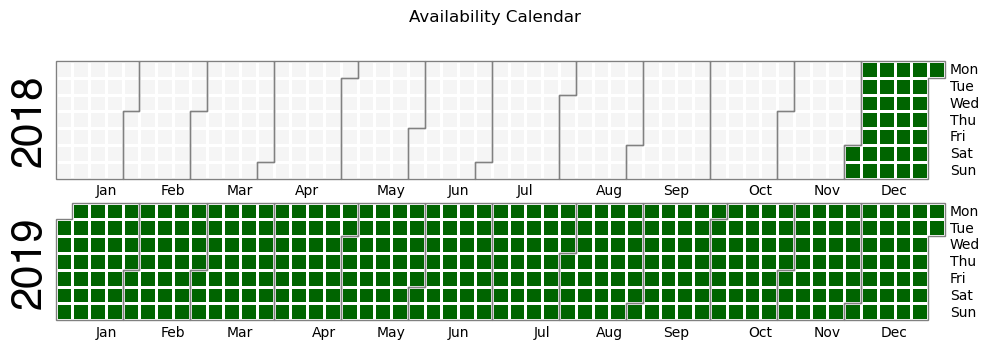

In [39]:
import pandas as pd
import calplot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset
calendar = pd.read_csv('calendar.csv')

# Convert the date column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the month and year from the date
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year

# Group the data by month and count the number of available listings
availability_counts = calendar[calendar['available'] == 't'].groupby(['year', 'month']).size().reset_index(name='count')

# Create a list of availability counts for each month
availability_list = []
for i, row in availability_counts.iterrows():
    month = row['month']
    year = row['year']
    count = row['count']
    max_day = calendar.monthrange(year, month)[1]  # Get the maximum number of days for the month
    availability_list.extend([pd.Timestamp(year=year, month=month, day=day) for day in range(1, max_day + 1)])

# Convert the availability list to a pandas Series
availability_series = pd.Series(data=1, index=availability_list)

# Define a custom colormap with dark green color for 't' value
cmap = mcolors.ListedColormap(['darkgreen'])

# Plot the heatmap calendar with dark green color for 't' value
calplot.calplot(availability_series, cmap=cmap, yearlabel_kws={'color': 'black'}, suptitle='Availability Calendar')

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
listing["room_type"] = listing["room_type"].str.lower()

listing["room_type"] = listing["room_type"].astype("category")

room_frequencies = listing["room_type"].value_counts()

print(room_frequencies)

room_type
entire home/apt    15889
private room        4076
shared room           65
Name: count, dtype: int64


entire home/apt 79%
private room    20%
shared room     1%

In [48]:
neighbourhoods = listing.groupby("neighbourhood")["price"].agg(["sum", "mean", "median", "count"])

neighbourhoods = neighbourhoods.round(2).sort_values("mean", ascending=False)

print(neighbourhoods)

                                           sum    mean  median  count
neighbourhood                                                        
Centrum-West                            441754  189.92   150.0   2326
Centrum-Oost                            327621  189.38   150.0   1730
Zuid                                    246594  171.13   130.0   1441
IJburg - Zeeburgereiland                 74651  165.16   144.0    452
Oud-Noord                                90038  157.68   120.0    571
De Pijp - Rivierenbuurt                 391846  157.18   135.0   2493
Buitenveldert - Zuidas                   40109  153.09   117.0    262
De Baarsjes - Oud-West                  505630  143.85   125.0   3515
Oud-Oost                                183837  143.40   125.0   1282
Westerpark                              210096  141.00   120.0   1490
Watergraafsmeer                          75908  137.51   120.0    552
Oostelijk Havengebied - Indische Buurt  120920  126.09   110.0    959
Geuzenveld - Sloterm

In [55]:
total_prices = listing["price"]

# Calculate the 25th, 50th, and 75th percentiles
percentiles = np.percentile(total_prices, [25, 50, 75])

# Print the results
print("25th percentile: ", percentiles[0])
print("50th percentile (median): ", percentiles[1])
print("75th percentile: ", percentiles[2])


25th percentile:  96.0
50th percentile (median):  125.0
75th percentile:  175.0


In [56]:
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 96, 125, 175, np.inf]

listing["price_range"] = pd.cut(listing["price"], bins=ranges, labels=label_names)
prices_by_neighbourhood = listing.groupby(["neighbourhood", "price_range"])["price_range"].count()

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)


print(prices_by_neighbourhood)

neighbourhood                           price_range
Bijlmer-Centrum                         Budget           81
                                        Average          14
                                        Expensive         8
                                        Extravagant       8
Bijlmer-Oost                            Budget           57
                                        Average          19
                                        Expensive         9
                                        Extravagant      11
Bos en Lommer                           Budget          428
                                        Average         370
                                        Expensive       226
                                        Extravagant     120
Buitenveldert - Zuidas                  Budget           90
                                        Average          57
                                        Expensive        45
                                        Extravag